In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

%matplotlib inline
#plt.style.use('ggplot')

In [6]:
def class_contour(X,X_train,Y_train,model):
    ''' function that returns arrays of the countour of the decision boundary of class 0 '''    
    xx, yy = np.meshgrid(np.linspace(-2, 2, 100),
                        np.linspace(-2, 2, 100))
    if model == 'naive':
        clf = GaussianNB()
        clf.fit(X_train,np.array(Y_train))
        Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
        Z = Z[:,1].reshape(xx.shape)
    elif model == 'dt':
        clf = DecisionTreeClassifier(random_state=0).fit(X_train,np.array(Y_train))
        Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])
        Z = Z[:,1].reshape(xx.shape)
    return xx,yy,Z

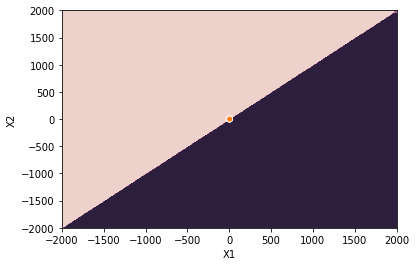

In [28]:
data = pd.read_csv("data\\test2.csv")
trainX = data.iloc[:,0:2]
trainY = data.iloc[:,2]

#Generate grid of data points to show prediction
x = y = np.linspace(-2000,2000,500)
df = pd.DataFrame(np.array(np.meshgrid(x,y)).T.reshape(-1,2))
df = df.rename(index=int, columns={0: "X1", 1: "X2"})

#NB
nb = GaussianNB()
nb.fit(trainX, trainY)
df["PredictionNB"]= nb.predict_proba(df)[:,0]

#Plotting
fig, ax = plt.subplots(1, 1)
ax.set_ylim([-2000,2000])
ax.set_xlim([-2000,2000])

#Plot NB
sns.scatterplot(x=df["X1"],y=df["X2"], hue=df["PredictionNB"],s=20,linewidth=0,alpha=1,marker='s')
#xx,yy,z = class_contour(df.iloc[:,:2].values,trainX,trainY,'naive')
#ax.contour(xx,yy,z,[.5])

sns.scatterplot(x=[0,1,2,3,3,4,5,6], y=[3,4,5,6,3,2,1,0],hue=[0,0,0,0,1,1,1,1])
ax.legend().remove()
